In [1]:
pip install numpy pandas tensorflow scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


### import the dataset

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
sales_data = pd.read_csv('train.csv')
store_data = pd.read_csv('store.csv')

# Merge datasets
data = pd.merge(sales_data, store_data, on='Store', how='left')

# Preview the data
print(data.head())


C:\Users\Teja Dithya\AppData\Local\Temp\ipykernel_15236\2976363199.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('train.csv')


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

### pre-process the data

In [3]:
# Handle missing values
data.fillna(0, inplace=True)

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Encode categorical variables
data['StateHoliday'] = data['StateHoliday'].astype('category').cat.codes
data['StoreType'] = data['StoreType'].astype('category').cat.codes
data['Assortment'] = data['Assortment'].astype('category').cat.codes

# Drop unnecessary columns
data.drop(['Date', 'Customers'], axis=1, inplace=True)


### split the data

In [4]:
from sklearn.model_selection import train_test_split

# Feature matrix and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train.dtypes)


Store                          int64
DayOfWeek                      int32
Open                           int64
Promo                          int64
StateHoliday                    int8
SchoolHoliday                  int64
StoreType                       int8
Assortment                      int8
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Year                           int32
Month                          int32
Day                            int32
dtype: object


### scale the data

In [7]:
!pip install pandas scikit-learn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.5 MB 3.9 MB/s eta 0:00:03
   ----------- ---------------------------- 3.4/11.5 MB 4.5 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.5 MB 5.0 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.5 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 5.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.7/11.5 MB 5.5 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.5 MB 5.3 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 5.1 MB/s eta 0:00:01
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


### scale the data

In [8]:
#Assuming 'data' is your DataFrame
# ... (your existing code for loading and preprocessing data) ...

# Feature matrix and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder for 'PromoInterval'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array output

X_train['PromoInterval'] = X_train['PromoInterval'].astype(str)
X_test['PromoInterval'] = X_test['PromoInterval'].astype(str)

# Create a OneHotEncoder for 'PromoInterval'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for numpy array output

# Fit and transform the 'PromoInterval' column in the training data
promo_interval_train = encoder.fit_transform(X_train[['PromoInterval']])

# Transform the 'PromoInterval' column in the testing data
promo_interval_test = encoder.transform(X_test[['PromoInterval']])

# Get feature names for the encoded columns
promo_interval_feature_names = encoder.get_feature_names_out(['PromoInterval'])

# Create DataFrames for the encoded 'PromoInterval'
promo_interval_train_df = pd.DataFrame(promo_interval_train, columns=promo_interval_feature_names, index=X_train.index)
promo_interval_test_df = pd.DataFrame(promo_interval_test, columns=promo_interval_feature_names, index=X_test.index)

# Drop the original 'PromoInterval' column and concatenate the encoded columns
X_train = X_train.drop('PromoInterval', axis=1).join(promo_interval_train_df)
X_test = X_test.drop('PromoInterval', axis=1).join(promo_interval_test_df)

# Now you can apply MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

### reshape the data

In [9]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

### build the model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Summary of the model
model.summary()

c:\Users\Teja Dithya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,451 (56.45 KB)

 Trainable params: 14,451 (56.45 KB)

 Non-trainable params: 0 (0.00 B)

### train the model

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 2/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 3/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 4/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 5/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 6/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 7/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 10/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - loss: 0.0031 - val_loss: 0.0027


### evalute the model

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actuals
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 5s 782us/step
MAE: 1323.82
RMSE: 1988.80


### visuaize model

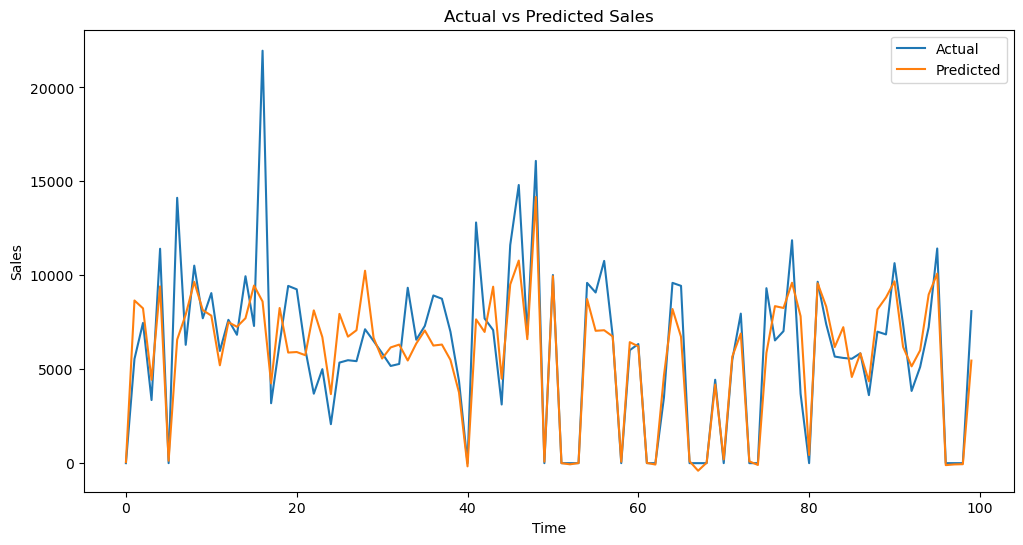

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()